<a href="https://colab.research.google.com/github/henselwilson/ChennaiHousePriceAnalysisAndPrediction/blob/main/ChennaiHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chennai House Price Prediction

This kernel analyses the House Sales Price data of Houses in Chennai.


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
pd.set_option('display.max_columns', None)
df=pd.read_csv("https://raw.githubusercontent.com/henselwilson/ChennaiHousePriceAnalysisAndPrediction/main/train-chennai-sale.csv",index_col="PRT_ID")
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
print(df.loc[df['N_BEDROOM'].isnull(),'INT_SQFT'])
print('\n Lets find the average area for different bhk')
print(df[['N_BEDROOM','INT_SQFT']].groupby('N_BEDROOM').mean())
print(" It is close to 2bhk")
df['N_BEDROOM'].fillna(2,inplace=True)

In [ ]:
df[df['N_BATHROOM'].isnull()]
print(df[['N_BEDROOM','N_BATHROOM']].groupby('N_BEDROOM').mean())
print('No.of 1 bhk with bathroom null values')
print(df.loc[df['N_BEDROOM']==1,'N_BATHROOM'].isnull().sum())
df['N_BATHROOM'].fillna(1,inplace=True)

In [ ]:
df[df['QS_OVERALL'].isnull()]
print(df[['N_BEDROOM','QS_OVERALL']].groupby('N_BEDROOM').mean())
df['QS_OVERALL'].fillna(3.5,inplace=True)

In [ ]:
df[df.duplicated()]
print("No Duplicate Values")

In [ ]:
df['AREA'].value_counts()
df['AREA'].replace(to_replace=['Chrompt','Chrmpet','Chormpet','Chrompet'],value=10,inplace=True)
df['AREA'].replace(to_replace=['TNagar','T Nagar'],value=20,inplace=True)
df['AREA'].replace(to_replace=['Karapakam','Karapakkam'],value=30,inplace=True)
df['AREA'].replace(to_replace=['Ana Nagar','Ann Nagar','Anna Nagar'],value=40,inplace=True)
df['AREA'].replace(to_replace=['Velchery','Velachery'],value=50,inplace=True)
df['AREA'].replace(to_replace=['Adyr','Adyar'],value=60,inplace=True)
df['AREA'].replace(to_replace=['KKNagar','KK Nagar'],value=70,inplace=True)

In [ ]:
df['SALE_COND'].value_counts()
df['SALE_COND'].replace(to_replace=['Partiall','PartiaLl','Partial'],value=10,inplace=True)
df['SALE_COND'].replace(to_replace=['Adj Land','AdjLand'],value=20,inplace=True)
df['SALE_COND'].replace(to_replace=['Ab Normal','AbNormal'],value=30,inplace=True)
df['SALE_COND'].replace(to_replace=['Family'],value=40,inplace=True)
df['SALE_COND'].replace(to_replace=['Normal Sale'],value=50,inplace=True)

In [ ]:
df['PARK_FACIL'].value_counts()
df['PARK_FACIL'].replace(to_replace=['No','Noo'],value=0,inplace=True)
df['PARK_FACIL'].replace(to_replace='Yes',value=1,inplace=True)

In [ ]:
df['BUILDTYPE'].value_counts()
df['BUILDTYPE'].replace(to_replace=['Comercial'],value='Commercial',inplace=True)
df['BUILDTYPE'].replace(to_replace=['Other'],value='Others',inplace=True)
df=pd.get_dummies(df,columns=['BUILDTYPE'])
df.drop(columns=['BUILDTYPE_Others'],axis=1,inplace=True)

In [ ]:
df['UTILITY_AVAIL'].value_counts()
df['UTILITY_AVAIL'].replace(to_replace=['All Pub'],value='AllPub',inplace=True)
df['UTILITY_AVAIL'].replace(to_replace=['NoSeWa','NoSewr '],value='NoSewr',inplace=True)
df=pd.get_dummies(df,columns=['UTILITY_AVAIL'])
df.drop(columns=['UTILITY_AVAIL_ELO'],axis=1,inplace=True)

In [ ]:
df['STREET'].value_counts()
df['STREET'].replace(to_replace=['Pavd'],value='Paved',inplace=True)
df['STREET'].replace(to_replace=['NoAccess'],value='No Access',inplace=True)
df=pd.get_dummies(df,columns=['STREET'])
df.drop(columns=['STREET_No Access'],axis=1,inplace=True)

In [ ]:
df['MZZONE'].value_counts()
df['MZZONE'].replace(to_replace=['RL'],value=10,inplace=True)
df['MZZONE'].replace(to_replace=['RH'],value=20,inplace=True)
df['MZZONE'].replace(to_replace=['RM'],value=30,inplace=True)
df['MZZONE'].replace(to_replace=['C'],value=40,inplace=True)
df['MZZONE'].replace(to_replace=['A'],value=50,inplace=True)
df['MZZONE'].replace(to_replace=['I'],value=60,inplace=True)

In [ ]:
df['DATE_BUILD']=df['DATE_BUILD'].astype('datetime64')
df['DATE_SALE']=df['DATE_SALE'].astype('datetime64')
df['AGE']=df['DATE_SALE']-df['DATE_BUILD']
df['AGE']=df['AGE'].dt.days.astype('int64')

In [ ]:
df['DATE_BUILD'].min()

In [ ]:
df['DATE_BUILD'] = df['DATE_BUILD'].dt.year
df['DATE_SALE'] = df['DATE_SALE'].dt.year

In [ ]:
df.drop(columns=['REG_FEE','COMMIS'],axis=1,inplace=True)
sale_price=df['SALES_PRICE']
df.drop(columns=['SALES_PRICE'],axis=1,inplace=True)
df['SALE_PRICE']=sale_price
df.head(2)
df.info()

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(2,4,figsize=(30,8))

columnsN = ['INT_SQFT','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','AGE','SALE_PRICE']

for col, ax in zip(columnsN,axs.flatten()):
  sns.boxplot(x=df[col], ax=ax)

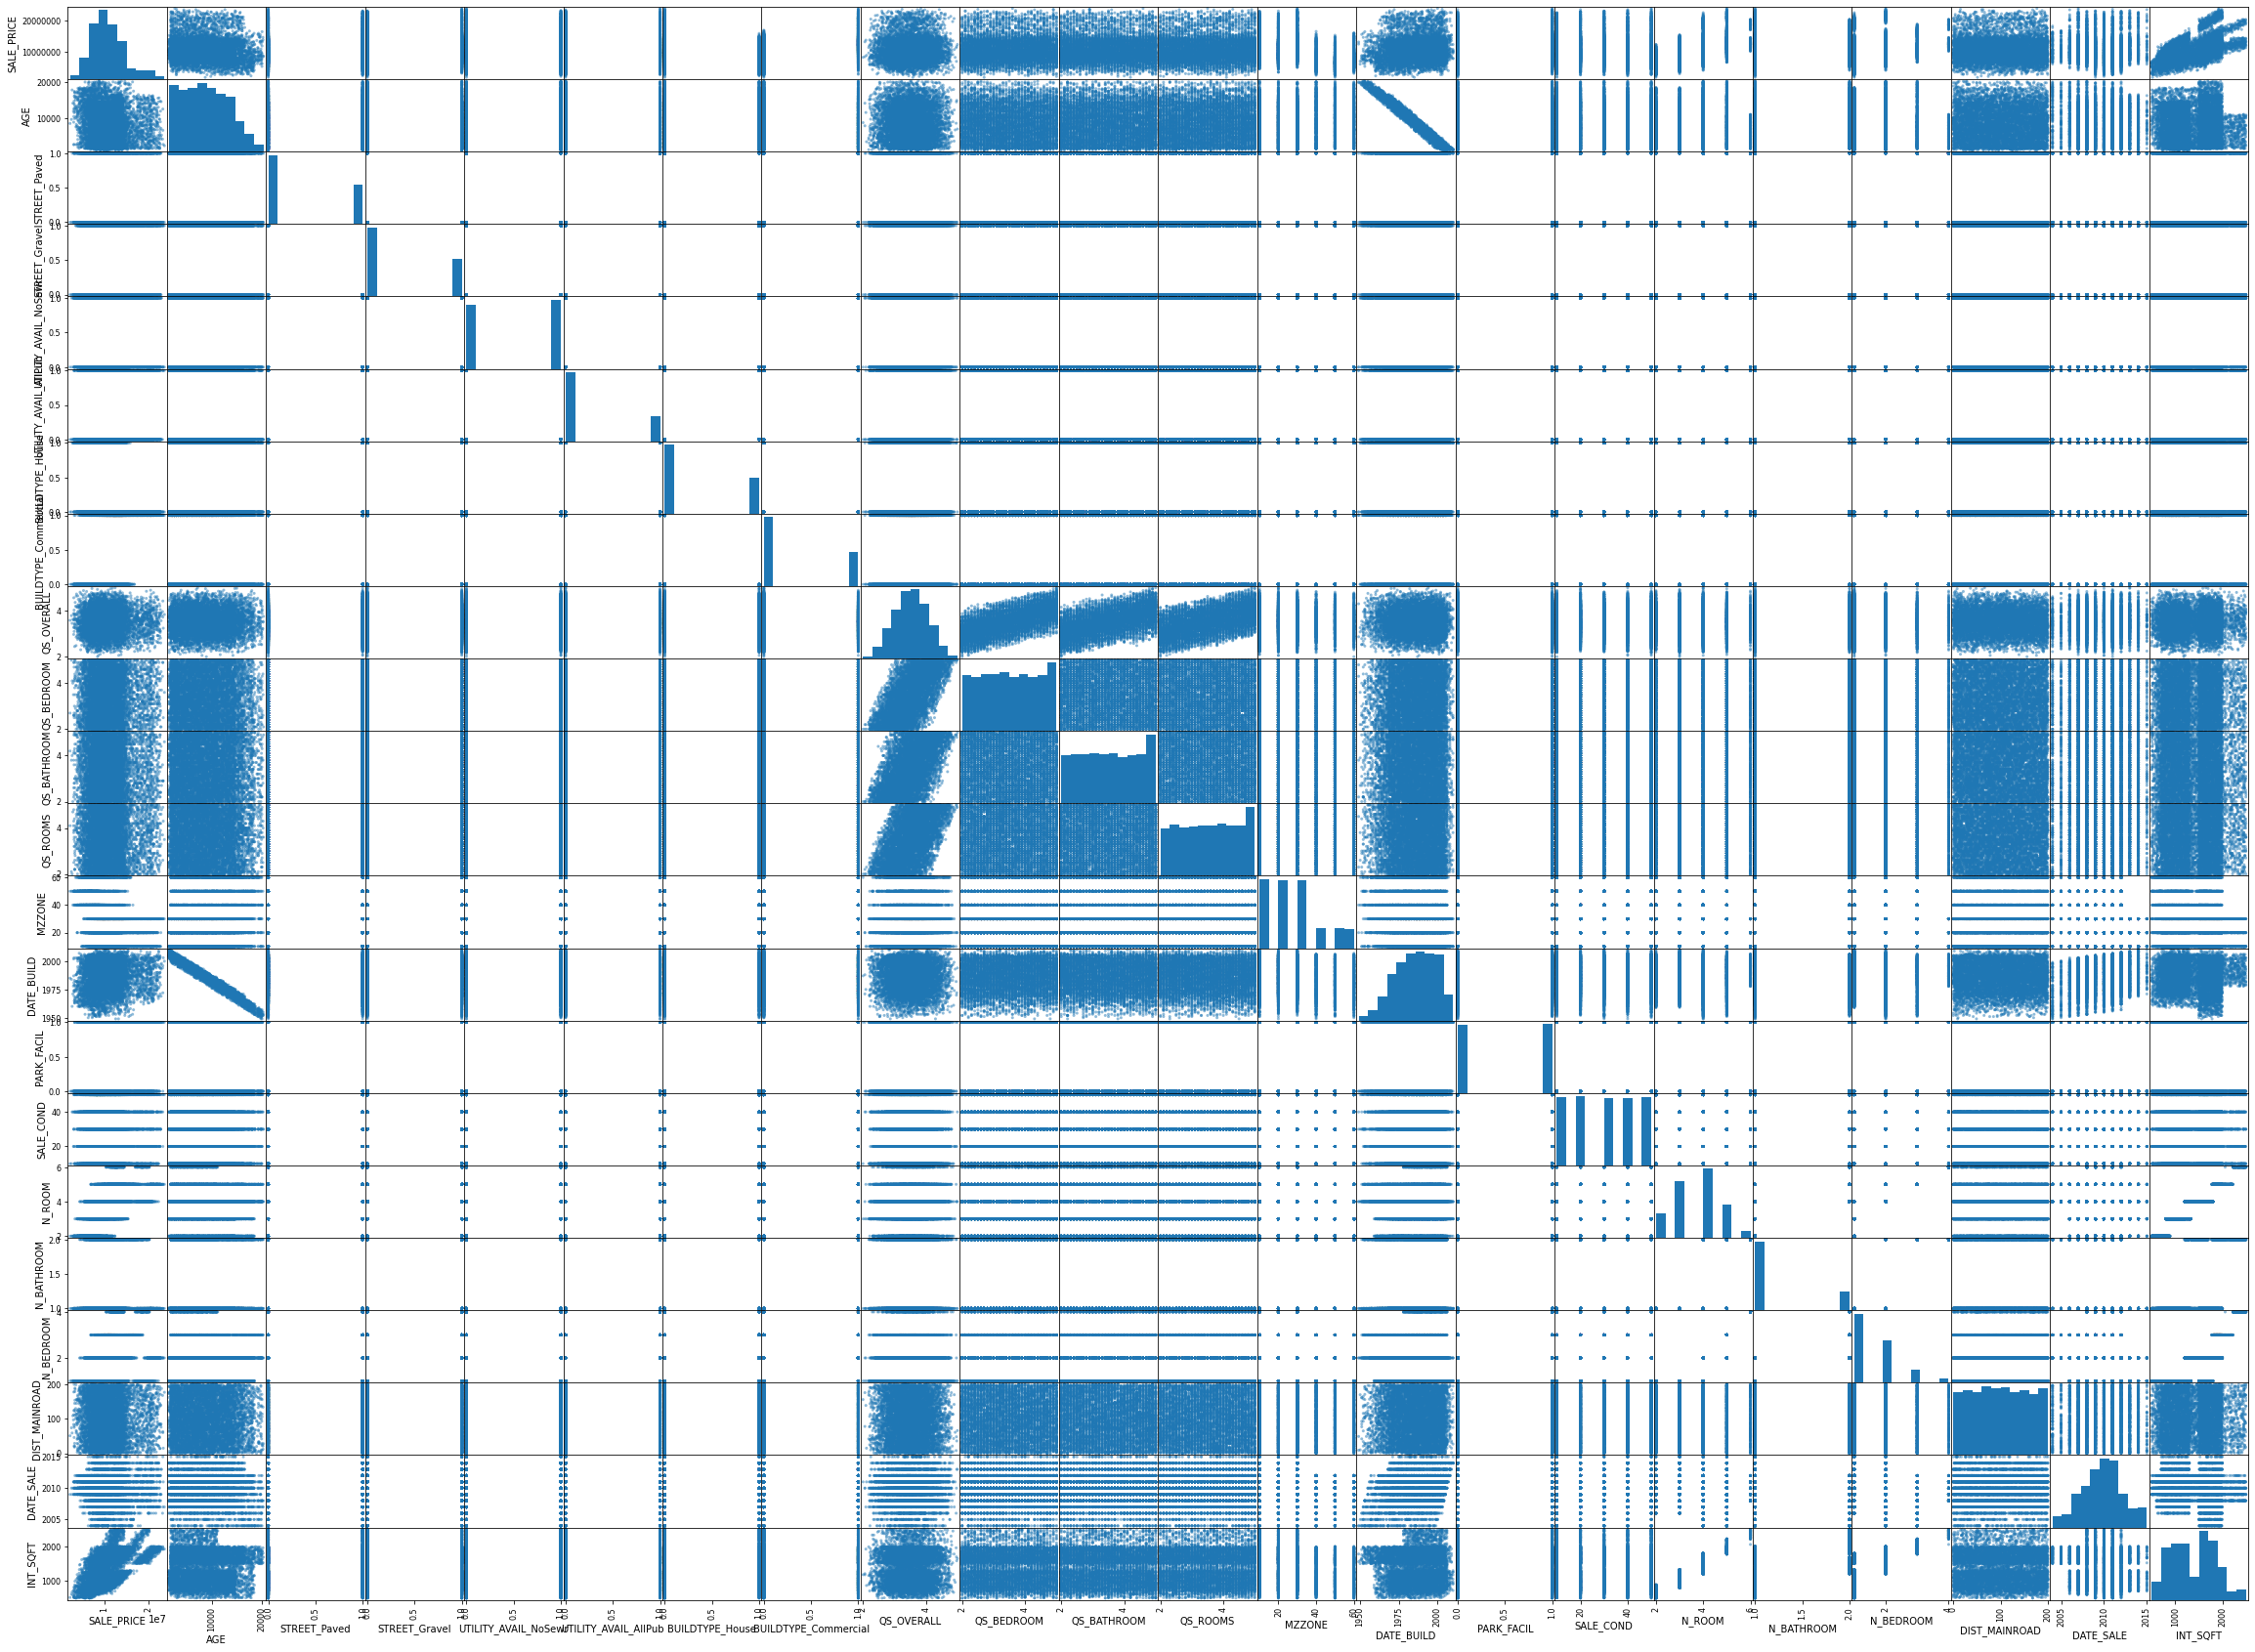

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:,-1:0:-1],figsize=(40,30))
plt.show()

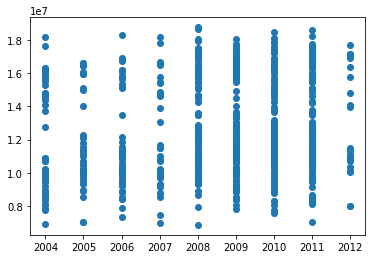

In [25]:
bhk2=df[df['N_BEDROOM']==3]
plt.scatter(abs(bhk2['DATE_SALE']) ,bhk2['SALE_PRICE'])

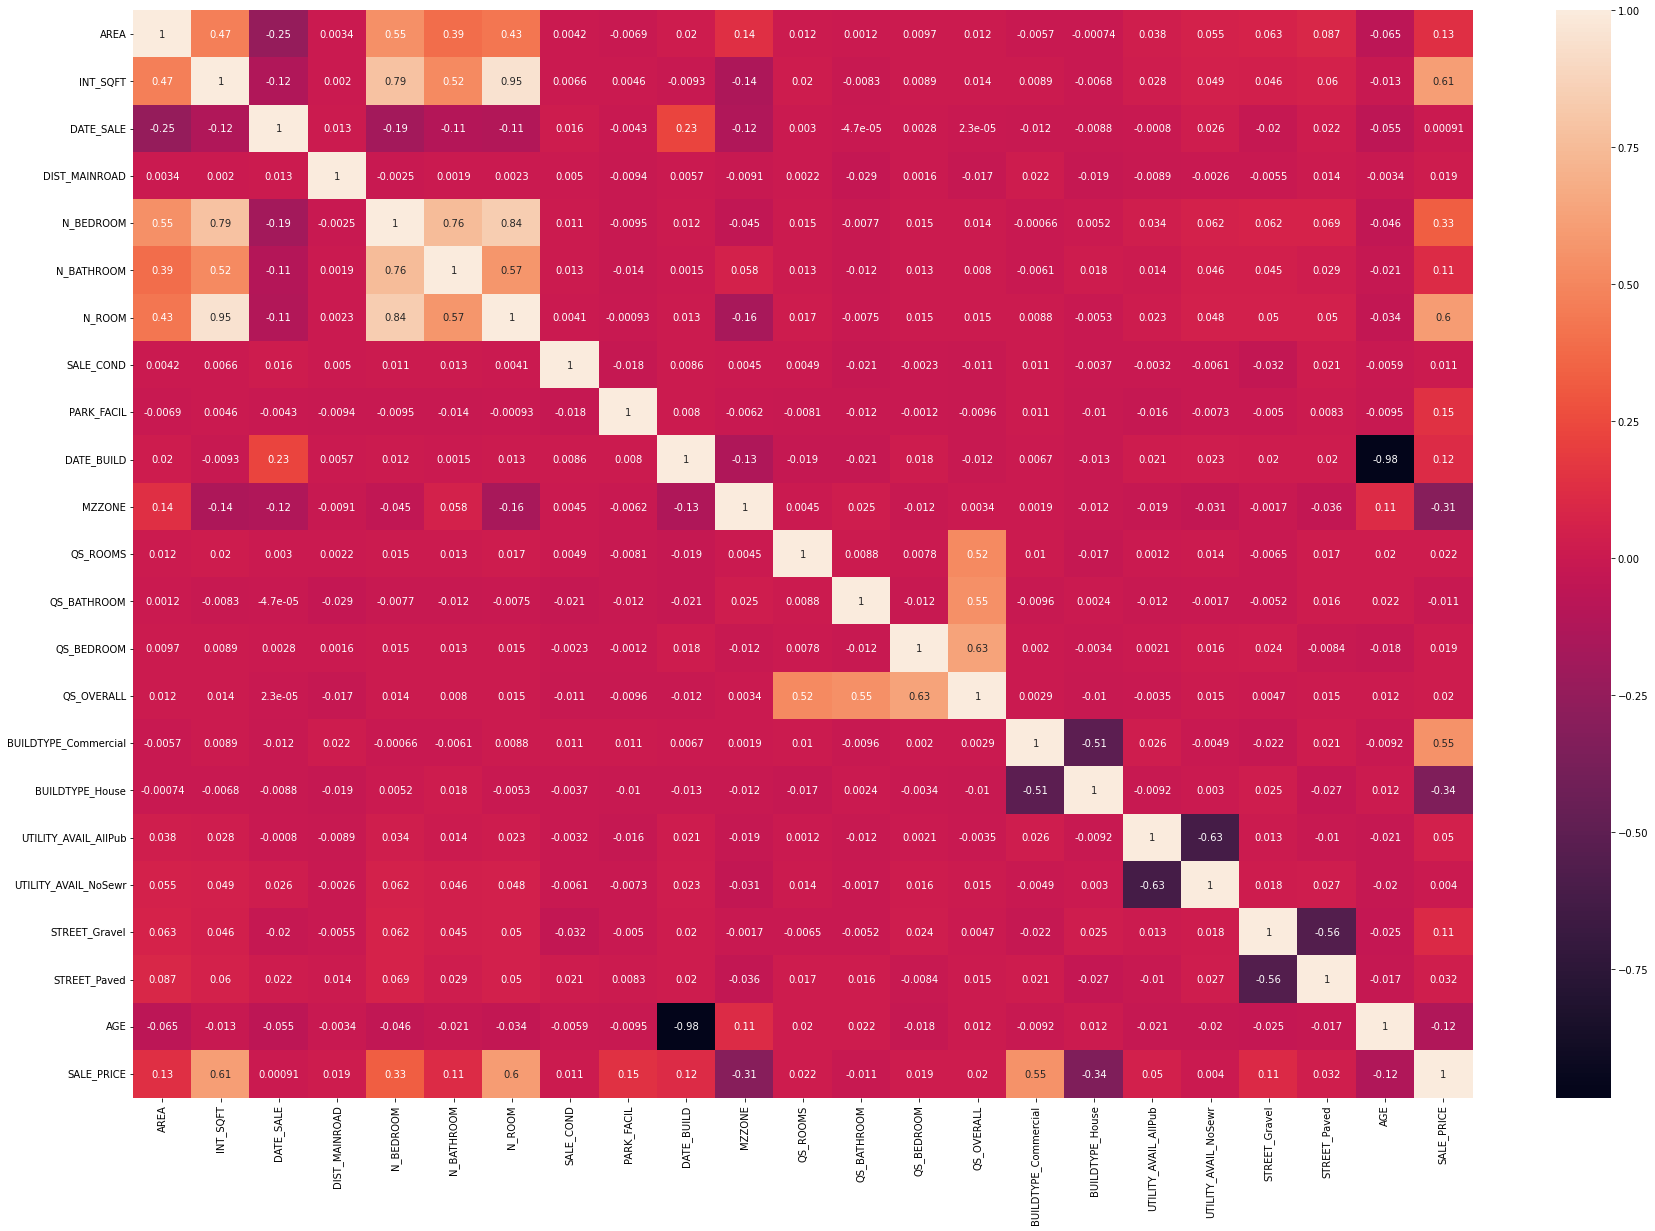

In [26]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

In [27]:
from sklearn.model_selection import train_test_split
X=df[['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','MZZONE','AGE','DIST_MAINROAD','UTILITY_AVAIL_AllPub','DATE_SALE']].values.reshape(-1,12)
Y=df['SALE_PRICE']
#X_val=df[['AGE']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

X_trainP=pd.DataFrame(X_train)
X_trainP[0]=scaler.fit_transform(X_trainP[0].values.reshape(-1,1))
X_trainP[8]=scaler.fit_transform(X_trainP[8].values.reshape(-1,1))
X_trainP[9]=scaler.fit_transform(X_trainP[9].values.reshape(-1,1))
X_testP=pd.DataFrame(X_test)
X_testP[0]=scaler.fit_transform(X_testP[0].values.reshape(-1,1))
X_testP[8]=scaler.fit_transform(X_testP[8].values.reshape(-1,1))
X_testP[9]=scaler.fit_transform(X_testP[9].values.reshape(-1,1))

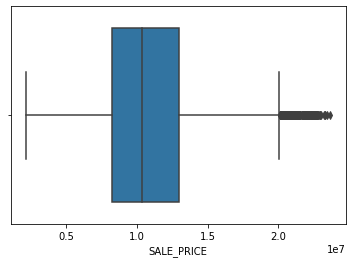

In [29]:
import seaborn as sns

sns.boxplot(data=df,x='SALE_PRICE')
plt.show()

In [30]:
df['scaled_price']=scaler.fit_transform(df['SALE_PRICE'].values.reshape(-1,1))
outlier_indx=df[df['scaled_price']>2].index
outlier_indx.shape

(397,)

In [31]:
X_test=X_testP.values.reshape(-1,12)
X_train=X_trainP.values.reshape(-1,12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7109 entries, P03210 to P09794
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DATE_SALE             7109 non-null   int64  
 3   DIST_MAINROAD         7109 non-null   int64  
 4   N_BEDROOM             7109 non-null   float64
 5   N_BATHROOM            7109 non-null   float64
 6   N_ROOM                7109 non-null   int64  
 7   SALE_COND             7109 non-null   int64  
 8   PARK_FACIL            7109 non-null   int64  
 9   DATE_BUILD            7109 non-null   int64  
 10  MZZONE                7109 non-null   int64  
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7109 non-null   float64
 15  BUILDTYPE_Commercia

In [33]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import r2_score

grad_Regressor=SGDRegressor()
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict=lin_reg.predict(X_test)
r2_score(y_test,y_predict)

0.833977064509311

In [34]:
from sklearn.tree import DecisionTreeRegressor

decsTree=DecisionTreeRegressor(max_depth=10)
decsTree.fit(X_train,y_train)
y_predi=decsTree.predict(X_test)
r2_score(y_test,y_predi)

0.9470107499337903

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knnMod=KNeighborsRegressor(n_neighbors=3)
knnMod.fit(X_train,y_train)
y_predt=knnMod.predict(X_test)
r2_score(y_test,y_predt)

0.8018459722137375

In [36]:
from sklearn.model_selection import KFold , cross_val_score

cv = KFold(n_splits=10)

res=cross_val_score(decsTree,X=X,y=Y, scoring='r2',cv=cv)
res.mean()

0.9542682132634581

In [37]:
DecTreeModl=DecisionTreeRegressor(max_depth=10)
DecTreeModl.fit(X,Y)

DecisionTreeRegressor(max_depth=10)

In [38]:
import pickle

with open('DecisionTreeModel','wb') as PWfile:
  pickle.dump(DecTreeModl,PWfile)

In [41]:
from math import floor,ceil

with open('DecisionTreeModel','rb') as PRfile:
  model = pickle.load(PRfile)

def PredictPriceRange(features):
  params=np.array(features,ndmin=2)
  pred_value=model.predict(params)

  R = ((pred_value**2)*0.025)**(0.5)
  Pred_min=int(floor((pred_value-R)/100000))
  Pred_max=int(ceil((pred_value+R)/100000))
  result = (Pred_max,Pred_min)
  return result

features = []

isStart = input(" Welcome to Chennai House Price Predictor \n  To start finding the price, type 'Start' and hit Enter:  ")
if isStart.lower() == "start":
    sqft = input("Enter the approx. desired Area:  ")
    rooms = input("Enter the number of Total Rooms:  ")
    roomsB = input("Enter the number of Bedrooms:  ")
    buildType = input("Enter the build type (House/Commercial/Other <default> ):  ")
    area = input("Enter the nearest location from this list (Chrompet / T Nagar / Karapakkam / Anna Nagar / Velachery / Adyar / KK Nagar <default> ):  ")
    park = input("Does the building have Parking Facility: (Yes / No <default> ) ")
    mzZone = input("Enter the Metro  zone from the List (RL / RH / RM / C / A / I <default> ):  ")
    age = input("Enter the age of the building in years:  ")
    distMainrd = input("Enter the distance from the mainroad in metres:  ")
    util = input("Does the building have Utilities. Chose from list ( Yes <default> / No )")
    sale_year = input("Enter the Sale Year:  ")

try:

    features.append(int(sqft))

    features.append(int(rooms))

    if buildType.strip().lower() == "house":
        features.append(0)
        features.append(1)
    elif buildType.strip().lower() == "commercial":
        features.append(1)
        features.append(0)
    else:
        features.append(0)
        features.append(0)

    if area.strip().lower() == "chrompet":
        features.append(10)
    elif area.strip().lower() == "t nagar":
        features.append(20)
    elif area.strip().lower() == "karapakkam":
        features.append(30)
    elif area.strip().lower() == "anna nagar":
        features.append(40)
    elif area.strip().lower() == "velachery":
        features.append(50)
    elif area.strip().lower() == "adyar":
        features.append(60)
    else:
        features.append(70)

    features.append(int(roomsB))

    if park.strip().lower() == "yes":
        features.append(1)
    else:
        features.append(0)

    if mzZone.strip().lower() == "rl":
        features.append(10)
    elif mzZone.strip().lower() == "rh":
        features.append(20)
    elif mzZone.strip().lower() == "rm":
        features.append(30)
    elif mzZone.strip().lower() == "c":
        features.append(40)
    elif mzZone.strip().lower() == "a":
        features.append(50)
    else:
        features.append(60)
    
    features.append(int(age))

    features.append(int(distMainrd))

    if util.strip().lower() == "no":
        features.append(0)
    else:
        features.append(1)
    
    features.append(int(sale_year))


    result = PredictPriceRange(features)

    print("The price of the house with the specification ypu have provided will be in the range of Rs.{}L/- to Rs.{}L/-".format(result[1], result[0]))

except:
    print("Incorrect Entries")

 Welcome to Chennai House Price Predictor 
  To start finding the price, type 'Start' and hit Enter:  start
Enter the approx. desired Area:  1200
Enter the number of Total Rooms:  8
Enter the number of Bedrooms:  3
Enter the build type (House/Commercial/Other <default> ):  house
Enter the nearest location from this list (Chrompet / T Nagar / Karapakkam / Anna Nagar / Velachery / Adyar / KK Nagar <default> ):  adyar
Does the building have Parking Facility: (Yes / No <default> ) yes
Enter the Metro  zone from the List (RL / RH / RM / C / A / I <default> ):  a
Enter the age of the building in years:  10
Enter the distance from the mainroad in metres:  100
Does the building have Utilities. Chose from list ( Yes <default> / No )yes
Enter the Sale Year:  2006
The price of the house with the specification ypu have provided will be in the range of Rs.75L/- to Rs.104L/-


In [ ]:
#'INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','MZZONE','AGE','DIST_MAINROAD','UTILITY_AVAIL_AllPub'